### CSC478 Final Project: MovieLens
### Jun Tae Son |  Yuchen Wu | Tzu Hao Peng

In [1]:
import pandas as pd
import numpy as np

##### Preprocessing Data

In [2]:
### To read all dataset
rating_cols = ['user id','movie id','rating','timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=rating_cols,encoding='latin-1')

item_cols = ['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance ','Sci-Fi','Thriller','War' ,'Western']
movies=pd.read_csv('u.item',sep='|',names=item_cols,encoding='latin-1')

user_cols = ['user id','age','gender','occupation','zip code']
users = pd.read_csv('u.user', sep='|', names=user_cols,encoding='latin-1')

#genre_cols=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance ','Sci-Fi','Thriller','War' ,'Western']
#genre = pd.read_csv("u.genre",sep='|',encoding='latin-1')

In [3]:
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
ratings=ratings.drop(['timestamp'], axis=1)

In [7]:
ratings.head()

,user id,movie id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [8]:
#movies=movies.drop(['release date','video release date','IMDb URL'], axis=1)
movies=movies.drop(['movie id', 'release date','video release date','IMDb URL'], axis=1)

In [9]:
movies.head()

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
a= movies.drop(['movie title'], axis = 1)

In [11]:
rating=ratings.pivot(index='user id', columns='movie id', values='rating')

In [12]:
rating.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_rating=rating.fillna(0)

In [14]:
df_rating.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Kmeans:Users

In [15]:
from sklearn.cluster import KMeans

In [16]:
from sklearn import decomposition

In [82]:
pca = decomposition.PCA()
DTtrans = pca.fit(df_rating).transform(df_rating)

In [83]:
np.set_printoptions(precision=2,suppress=True)
print DTtrans

[[ 27.17   1.86   5.47 ...,   0.     0.     0.  ]
 [-10.41   0.51   9.62 ...,   0.    -0.     0.  ]
 [-13.23  -0.27   0.53 ...,  -0.01   0.     0.  ]
 ..., 
 [-11.36   2.15  -0.6  ...,   0.     0.01  -0.  ]
 [ -0.49  -6.08  -4.14 ...,   0.    -0.     0.  ]
 [ 13.36  10.37  -5.71 ...,   0.    -0.    -0.  ]]


In [84]:
print(pca.explained_variance_ratio_)

[ 0.17  0.05  0.03  0.02  0.02  0.02  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0

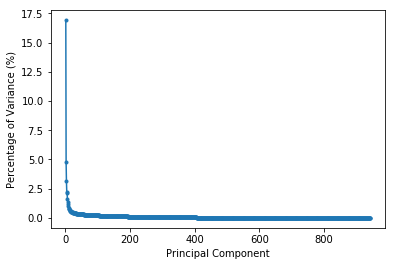

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 944), pca.explained_variance_ratio_*100,marker='.')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

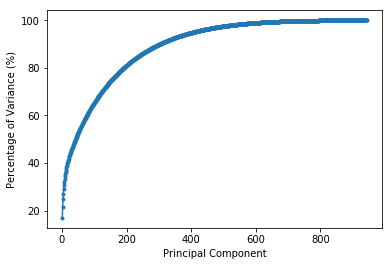

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 944), pca.explained_variance_ratio_.cumsum()*100,marker='.')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

In [94]:
pca.explained_variance_ratio_.cumsum()[300]

0.89886431299202785

In [95]:
kmeans=KMeans(n_clusters=300)

In [96]:
kmeans.fit(df_rating,)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=300, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
labels=kmeans.labels_

In [98]:
centroids=kmeans.cluster_centers_

In [99]:
pd.set_option('display.max_rows',df_rating.describe().shape[1])
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,5.000000e+00,0.000000,5.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.846154e+00,1.110223e-16,-5.551115e-17,0.230769,3.076923e-01,0.000000e+00,1.692308,5.384615e-01,0.923077,-5.551115e-17,...,-8.673617e-19,0.000000e+00,-8.673617e-19,0.000000e+00,-8.673617e-19,0.000000e+00,-8.673617e-19,0.000000e+00,-8.673617e-19,-8.673617e-19
2,4.000000e+00,1.333333e+00,0.000000e+00,3.333333,0.000000e+00,1.387779e-17,3.000000,0.000000e+00,1.000000,5.551115e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,5.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,4.333333e+00,5.551115e-17,2.222222e-01,0.000000,0.000000e+00,-1.387779e-17,2.666667,1.000000e+00,1.000000,5.555556e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,3.500000e+00,3.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,3.500000,1.500000e+00,1.500000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2.400000e+00,1.400000e+00,0.000000e+00,1.200000,8.000000e-01,0.000000e+00,2.400000,1.200000e+00,1.000000,0.000000e+00,...,-4.336809e-19,0.000000e+00,-4.336809e-19,0.000000e+00,-4.336809e-19,0.000000e+00,-4.336809e-19,0.000000e+00,-4.336809e-19,-4.336809e-19
8,4.000000e+00,3.000000e+00,0.000000e+00,4.000000,4.000000e+00,0.000000e+00,4.000000,5.000000e+00,4.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,3.000000e+00,2.000000e+00,0.000000e+00,4.000000,3.000000e+00,0.000000e+00,2.000000,5.000000e+00,3.000000,3.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [100]:
movie_names = movies['movie title']

In [101]:
movie_names

0                                        Toy Story (1995)
1                                        GoldenEye (1995)
2                                       Four Rooms (1995)
3                                       Get Shorty (1995)
4                                          Copycat (1995)
5       Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                   Twelve Monkeys (1995)
7                                             Babe (1995)
8                                 Dead Man Walking (1995)
9                                      Richard III (1995)
10                                   Seven (Se7en) (1995)
11                             Usual Suspects, The (1995)
12                                Mighty Aphrodite (1995)
13                                     Postino, Il (1994)
14                              Mr. Holland's Opus (1995)
15                     French Twist (Gazon maudit) (1995)
16                             From Dusk Till Dawn (1996)
17            

In [102]:
genre_types = movies.columns[2:]

In [103]:
genre_types

Index([u'Action', u'Adventure', u'Animation', u'Childrens', u'Comedy',
       u'Crime', u'Documentary', u'Drama', u'Fantasy', u'Film-Noir', u'Horror',
       u'Musical', u'Mystery', u'Romance ', u'Sci-Fi', u'Thriller', u'War',
       u'Western'],
      dtype='object')

In [104]:
items_array = np.array(movies)
movie_genre = np.array(movies[genre_types])

In [105]:
items_array

array([[u'Toy Story (1995)', 0L, 0L, ..., 0L, 0L, 0L],
       [u'GoldenEye (1995)', 0L, 1L, ..., 1L, 0L, 0L],
       [u'Four Rooms (1995)', 0L, 0L, ..., 1L, 0L, 0L],
       ..., 
       [u'Sliding Doors (1998)', 0L, 0L, ..., 0L, 0L, 0L],
       [u'You So Crazy (1994)', 0L, 0L, ..., 0L, 0L, 0L],
       [u'Scream of Stone (Schrei aus Stein) (1991)', 0L, 0L, ..., 0L, 0L,
        0L]], dtype=object)

In [106]:
movie_genre

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [114]:
def FiveStarMovies(centroids, labels, k, NTerms):
    five_star_movies = []
    cluster_movies = []
    for i in range(k):
        cluster_members = df_rating[labels==i]
        print 'cluster',i+1,'size: ', cluster_members.shape[0]
        movie_total_rating = np.array(cluster_members.sum(0)).astype(float)
        movie_rating_count = np.array((cluster_members!=0).sum(0)).astype(float)
        movie_average_rating = np.divide(movie_total_rating, movie_rating_count)
        movie_average_rating[np.isnan(movie_average_rating)] = 0
        rated_movie_list = sorted(zip(movie_names, movie_average_rating), key=lambda x: int(x[1]), reverse=True)
        to_append = []
        cluster_append = []
        for j in rated_movie_list:
            if j[1] == 5:
                to_append.append(j[0]) 
            if j[1] != 0:
                cluster_append.append(j[0])
        five_star_movies.append(to_append)
        cluster_movies.append(cluster_append)
    print "\n"
    # most rated movies in each cluster
    k = 0
    for m in five_star_movies:
        prototype = list(np.zeros(len(genre_types)))
        for n in items_array:    
            for i in m:
                if i == n[0]:
                    prototype += n[2:]
        print "Representative Movies:"
        for i in range(3):
            print m[i]
        print "\n"
        prototype = map(int, prototype)
        movie_genre_to_use = sorted(zip(genre_types, prototype), key=lambda x:int(x[1]), reverse=True)
        print "Cluster", k+1, "top genre: "
        for i in movie_genre_to_use[:NTerms]:
            print i[0]
        print "\n"
        k += 1
    return five_star_movies, cluster_movies

In [115]:
five_star_movies, cluster_movies = FiveStarMovies(centroids, labels, 300, 5)

cluster 1 size:  1
cluster 2 size:  13
cluster 3 size:  3
cluster 4 size:  2
cluster 5 size:  1
cluster 6 size:  9
cluster 7 size:  2
cluster 8 size:  5
cluster 9 size:  1
cluster 10 size:  1
cluster 11 size:  1
cluster 12 size:  19
cluster 13 size:  2
cluster 14 size:  1
cluster 15 size:  1
cluster 16 size:  1
cluster 17 size:  1
cluster 18 size:  1
cluster 19 size:  1
cluster 20 size:  1
cluster 21 size:  1
cluster 22 size:  49
cluster 23 size:  7
cluster 24 size:  1
cluster 25 size:  1
cluster 26 size:  1
cluster 27 size:  1
cluster 28 size:  23
cluster 29 size:  1
cluster 30 size:  16
cluster 31 size:  1
cluster 32 size:  1
cluster 33 size:  1
cluster 34 size:  1
cluster 35 size:  1
cluster 36 size:  1
cluster 37 size:  115
cluster 38 size:  1
cluster 39 size:  1
cluster 40 size:  1
cluster 41 size:  1
cluster 42 size:  1
cluster 43 size:  2
cluster 44 size:  1
cluster 45 size:  1
cluster 46 size:  1
cluster 47 size:  1
cluster 48 size:  

C:\Users\TPENG3\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


1
cluster 49 size:  1
cluster 50 size:  6
cluster 51 size:  1
cluster 52 size:  1
cluster 53 size:  1
cluster 54 size:  1
cluster 55 size:  1
cluster 56 size:  1
cluster 57 size:  1
cluster 58 size:  1
cluster 59 size:  1
cluster 60 size:  1
cluster 61 size:  1
cluster 62 size:  1
cluster 63 size:  1
cluster 64 size:  11
cluster 65 size:  1
cluster 66 size:  1
cluster 67 size:  1
cluster 68 size:  1
cluster 69 size:  1
cluster 70 size:  1
cluster 71 size:  1
cluster 72 size:  1
cluster 73 size:  1
cluster 74 size:  18
cluster 75 size:  1
cluster 76 size:  1
cluster 77 size:  1
cluster 78 size:  3
cluster 79 size:  2
cluster 80 size:  1
cluster 81 size:  1
cluster 82 size:  1
cluster 83 size:  1
cluster 84 size:  7
cluster 85 size:  1
cluster 86 size:  1
cluster 87 size:  1
cluster 88 size:  1
cluster 89 size:  1
cluster 90 size:  1
cluster 91 size:  1
cluster 92 size:  7
cluster 93 size:  1
cluster 94 size:  1
cluster 95 size:  1
cluster 96 size:  1
cluster 97 size:  1
cluster 98 size:

Sci-Fi
Action
Adventure


Representative Movies:
Toy Story (1995)
Mr. Holland's Opus (1995)
Apollo 13 (1995)


Cluster 35 top genre: 
Comedy
Drama
Romance 
Action
Adventure


Representative Movies:
Seven (Se7en) (1995)
Braveheart (1995)
Taxi Driver (1976)


Cluster 36 top genre: 
Drama
Comedy
Romance 
Action
Thriller


Representative Movies:
Four Rooms (1995)
Bad Boys (1995)
Exotica (1994)


Cluster 37 top genre: 
Drama
Comedy
Romance 
Adventure
Childrens


Representative Movies:
Twelve Monkeys (1995)
Babe (1995)
Usual Suspects, The (1995)


Cluster 38 top genre: 
Comedy
Drama
Thriller
Romance 
Action


Representative Movies:
Toy Story (1995)
Braveheart (1995)
Rumble in the Bronx (1995)


Cluster 39 top genre: 
Action
Drama
Comedy
Thriller
Adventure


Representative Movies:
Toy Story (1995)
Babe (1995)
Mr. Holland's Opus (1995)


Cluster 40 top genre: 
Comedy
Action
Romance 
Drama
Adventure


Representative Movies:
Pulp Fiction (1994)
Godfather, The (1972)
Citizen Kane (1941)


Cluster

Representative Movies:
Aladdin (1992)
Nikita (La Femme Nikita) (1990)
Chasing Amy (1997)


Cluster 92 top genre: 
Drama
Thriller
Comedy
Action
Romance 


Representative Movies:
Usual Suspects, The (1995)
Rumble in the Bronx (1995)
Clerks (1994)


Cluster 93 top genre: 
Drama
Romance 
Action
Comedy
Thriller


Representative Movies:
Usual Suspects, The (1995)
Star Wars (1977)
Mr. Smith Goes to Washington (1939)


Cluster 94 top genre: 
Drama
Comedy
Thriller
Action
Romance 


Representative Movies:
Toy Story (1995)
Braveheart (1995)
Desperado (1995)


Cluster 95 top genre: 
Action
Drama
Thriller
Adventure
Comedy


Representative Movies:
Dead Man Walking (1995)
Seven (Se7en) (1995)
Usual Suspects, The (1995)


Cluster 96 top genre: 
Drama
Romance 
Comedy
Thriller
Crime


Representative Movies:
Toy Story (1995)
Dead Man Walking (1995)
Eat Drink Man Woman (1994)


Cluster 97 top genre: 
Drama
Comedy
Thriller
Romance 
Crime


Representative Movies:
Shawshank Redemption, The (1994)
Forrest Gum



Cluster 156 top genre: 
Drama
Comedy
Romance 
Thriller
Crime


Representative Movies:
Toy Story (1995)
Twelve Monkeys (1995)
Seven (Se7en) (1995)


Cluster 157 top genre: 
Drama
Comedy
Romance 
Action
Thriller


Representative Movies:
Toy Story (1995)
Usual Suspects, The (1995)
Antonia's Line (1995)


Cluster 158 top genre: 
Drama
Romance 
Comedy
Crime
War


Representative Movies:
Crumb (1994)
Three Colors: Red (1994)
Three Colors: Blue (1993)


Cluster 159 top genre: 
Drama
Thriller
Comedy
Crime
Romance 


Representative Movies:
Seven (Se7en) (1995)
Mr. Holland's Opus (1995)
Braveheart (1995)


Cluster 160 top genre: 
Comedy
Action
Drama
Adventure
Thriller


Representative Movies:
Twelve Monkeys (1995)
Usual Suspects, The (1995)
Star Wars (1977)


Cluster 161 top genre: 
Action
Drama
Sci-Fi
Adventure
Comedy


Representative Movies:
Twelve Monkeys (1995)
Mighty Aphrodite (1995)
Clerks (1994)


Cluster 162 top genre: 
Drama
Romance 
Comedy
Sci-Fi
Mystery


Representative Movies:
Twelv

Representative Movies:
Toy Story (1995)
Mr. Holland's Opus (1995)
Braveheart (1995)


Cluster 219 top genre: 
Action
Drama
Adventure
Sci-Fi
Comedy


Representative Movies:
Twelve Monkeys (1995)
Usual Suspects, The (1995)
Taxi Driver (1976)


Cluster 220 top genre: 
Drama
Crime
Thriller
Sci-Fi
Action


Representative Movies:
Twelve Monkeys (1995)
Usual Suspects, The (1995)
Mighty Aphrodite (1995)


Cluster 221 top genre: 
Thriller
Drama
Sci-Fi
Action
Crime


Representative Movies:
Usual Suspects, The (1995)
Mr. Holland's Opus (1995)
Brothers McMullen, The (1995)


Cluster 222 top genre: 
Drama
Comedy
Romance 
Thriller
Crime


Representative Movies:
GoldenEye (1995)
Usual Suspects, The (1995)
Clerks (1994)


Cluster 223 top genre: 
Drama
Action
Crime
Comedy
Thriller


Representative Movies:
Dead Man Walking (1995)
Seven (Se7en) (1995)
Usual Suspects, The (1995)


Cluster 224 top genre: 
Drama
Comedy
Thriller
Crime
Romance 


Representative Movies:
Star Wars (1977)
Pulp Fiction (1994)
Ace

In [117]:
labels = kmeans.labels_; labels[0:5]

array([ 79,  11, 157, 157, 273])